In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from rdkit import Chem
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats

# 1. Mw_affinity_plot

# Uw

In [2]:
Uw_dealt_median = f'/pubhome/xli02/project/PLIM/v2019_dataset/index/PLANet_Uw_dealt_median.csv'
Uw_dealt_median_df = pd.read_csv(Uw_dealt_median, sep='\t')
len(Uw_dealt_median_df)

69826

In [3]:
max(Uw_dealt_median_df['MolWt'])

967.0625713239999

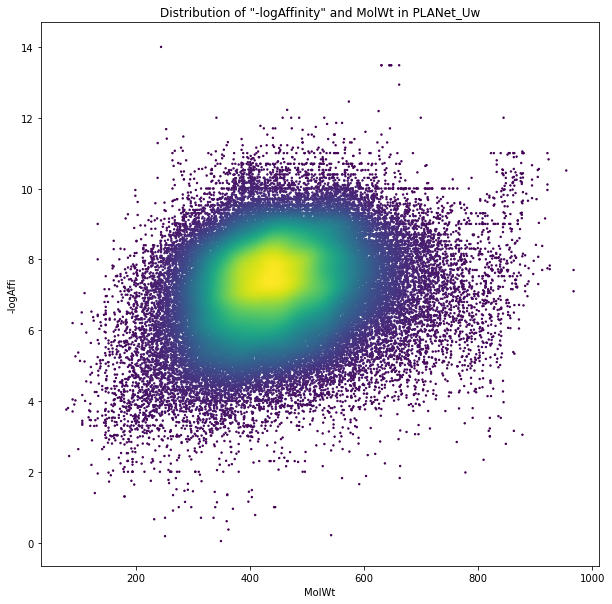

In [4]:
xy = np.vstack([Uw_dealt_median_df['MolWt'], Uw_dealt_median_df['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = Uw_dealt_median_df['MolWt'][idx], Uw_dealt_median_df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('MolWt')
ax.set_ylabel('-logAffi')
plt.title('Distribution of "-logAffinity" and MolWt in PLANet_Uw')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/Uw/Affi_Mw.png', dpi=300, bbox_inches='tight')

# PDBbind_general_set

In [5]:
PDBbind_dir = '/pubhome/xli02/Downloads/dataset/PDBbind/PDBbind_v2019'

In [6]:
PDBbind_v19_general = f'{PDBbind_dir}/INDEX_general_PL_data_grepped.2019'
PDBbind_v19_general_df = pd.read_csv(PDBbind_v19_general, sep='\t')
PDBbind_v19_general_df.head()

,pdb_id,-logAffi
0,3zzf,0.40
1,3gww,0.45
2,1w8l,0.49
3,3fqa,0.49
4,1zsb,0.60


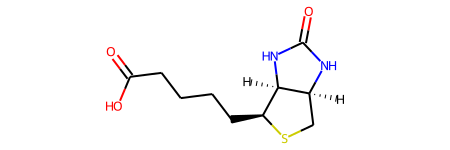

In [28]:
# cry_lig_mol

In [8]:
from rdkit.Chem import rdMolDescriptors

In [9]:
for row in PDBbind_v19_general_df.itertuples():
    cry_lig_smi = f'{PDBbind_dir}/general_structure_only/{row.pdb_id}/{row.pdb_id}_ligand.smi'
    if Path(cry_lig_smi).exists():
        cry_lig_mol = Chem.SmilesMolSupplier(cry_lig_smi, delimiter='\t',titleLine=False)[0]
        if cry_lig_mol is not None:
            Mw = Chem.rdMolDescriptors.CalcExactMolWt(cry_lig_mol)
            PDBbind_v19_general_df.loc[row.Index,'Mw_from_smi'] = Mw

RDKit ERROR: [10:43:50] Can't kekulize mol.  Unkekulized atoms: 10 12 24
RDKit ERROR: 
RDKit ERROR: [10:43:50] ERROR: Could not sanitize molecule on line 0
RDKit ERROR: [10:43:50] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 12 24
RDKit ERROR: 
RDKit ERROR: [10:43:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 10
RDKit ERROR: 
RDKit ERROR: [10:43:55] ERROR: Could not sanitize molecule on line 0
RDKit ERROR: [10:43:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 10
RDKit ERROR: 
RDKit ERROR: [10:43:57] Can't kekulize mol.  Unkekulized atoms: 37 40 43 44 47
RDKit ERROR: 
RDKit ERROR: [10:43:57] ERROR: Could not sanitize molecule on line 0
RDKit ERROR: [10:43:57] ERROR: Can't kekulize mol.  Unkekulized atoms: 37 40 43 44 47
RDKit ERROR: 
RDKit ERROR: [10:43:59] Can't kekulize mol.  Unkekulized atoms: 10 12 13
RDKit ERROR: 
RDKit ERROR: [10:43:59] ERROR: Could not sanitize molecule on line 0
RDKit ERROR: [10:43:59] ERROR: Can't kekulize mol.  Unkekulized atoms: 10 12 1

In [10]:
PDBbind_v19_general_df.head()

,pdb_id,-logAffi,Mw_from_smi
0,3zzf,0.40,189.063722
1,3gww,0.45,310.141325
2,1w8l,0.49,141.115364
3,3fqa,0.49,137.047678
4,1zsb,0.60,221.988132


In [11]:
len(PDBbind_v19_general_df[PDBbind_v19_general_df['Mw_from_smi'].isna()])

279

In [24]:
for row in PDBbind_v19_general_df.itertuples():
    pdbid = row.pdb_id
    sdf = f'{PDBbind_dir}/general_structure_only/{pdbid}/{pdbid}_ligand.sdf'
    if Path(sdf).exists():
        with open(sdf, 'r') as f:
            lines = f.readlines()
        Mw = float(lines[lines.index('> <MOLECULAR_WEIGHT>\n') + 1].strip())
        PDBbind_v19_general_df.loc[row.Index,'Mw_from_sdf_txt'] = Mw

In [25]:
len(PDBbind_v19_general_df[PDBbind_v19_general_df['Mw_from_sdf_txt'].isna()])

27

In [34]:
PDBbind_v19_general_df

,pdb_id,-logAffi,Mw_from_smi,Mw_from_sdf_txt
0,3zzf,0.40,189.063722,187.1
1,3gww,0.45,310.141325,310.2
2,1w8l,0.49,141.115364,141.1
3,3fqa,0.49,137.047678,136.1
4,1zsb,0.60,221.988132,222.2
...,...,...,...,...
17674,7cpa,13.96,584.228753,580.3
17675,2xuf,14.39,658.353243,658.5
17676,1avd,15.00,244.088163,243.2
17677,2xui,15.00,658.353243,658.5


In [13]:
PDBbind_v19_general_Mw_from_smi_notna = PDBbind_v19_general_df[~PDBbind_v19_general_df['Mw_from_smi'].isna()].copy()

In [14]:
PDBbind_v19_general_Mw_from_smi_notna.reset_index(drop=True, inplace=True)

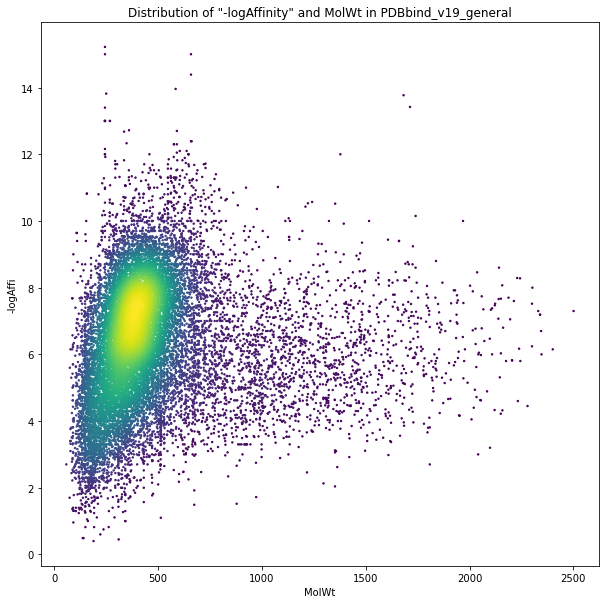

In [17]:
xy = np.vstack([PDBbind_v19_general_Mw_from_smi_notna['Mw_from_smi'], PDBbind_v19_general_Mw_from_smi_notna['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = PDBbind_v19_general_Mw_from_smi_notna['Mw_from_smi'][idx], PDBbind_v19_general_Mw_from_smi_notna['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('MolWt')
ax.set_ylabel('-logAffi')
plt.title('Distribution of "-logAffinity" and MolWt in PDBbind_v19_general')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/general/PDBbind_v19_general_Affi_Mw_from_smi.png', dpi=300, bbox_inches='tight')

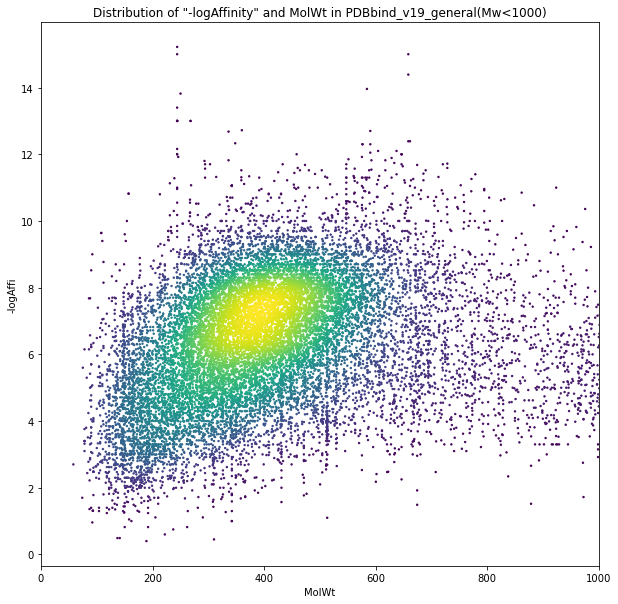

In [18]:
xy = np.vstack([PDBbind_v19_general_Mw_from_smi_notna['Mw_from_smi'], PDBbind_v19_general_Mw_from_smi_notna['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = PDBbind_v19_general_Mw_from_smi_notna['Mw_from_smi'][idx], PDBbind_v19_general_Mw_from_smi_notna['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('MolWt')
ax.set_ylabel('-logAffi')
ax.set_xlim((0,1000))
plt.title('Distribution of "-logAffinity" and MolWt in PDBbind_v19_general(Mw<1000)')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/general/PDBbind_v19_general_Affi_Mw_from_smi_Mw_1000.png', dpi=300, bbox_inches='tight')

# PDBbind_minimized

In [19]:
PDBbind_minimized_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/PDBbind_v2019/index/PDBbind_v19_minimized_succeed_RMSD_manually_modified.csv', sep='\t')
PDBbind_minimized_df.head()

,pdb_id,-logAffi,RMSD
0,3zzf,0.40,0.312
1,3gww,0.45,0.418
2,1w8l,0.49,0.517
3,3fqa,0.49,0.894
4,1zsb,0.60,0.395


In [21]:
PDBbind_minimized_Mw_df = pd.merge(PDBbind_minimized_df, PDBbind_v19_general_df, on=['pdb_id','-logAffi'], how='left')

In [44]:
PDBbind_minimized_Mw_df = pd.merge(PDBbind_minimized_df, PDBbind_v19_general_df, on=['pdb_id','-logAffi'], how='left')
PDBbind_minimized_Mw_df

,pdb_id,-logAffi,RMSD,Mw_from_smi,Mw_from_sdf_txt
0,3zzf,0.40,0.312,189.063722,187.1
1,3gww,0.45,0.418,310.141325,310.2
2,1w8l,0.49,0.517,141.115364,141.1
3,3fqa,0.49,0.894,137.047678,136.1
4,1zsb,0.60,0.395,221.988132,222.2
...,...,...,...,...,...
17174,7cpa,13.96,0.477,584.228753,580.3
17175,2xuf,14.39,0.214,658.353243,658.5
17176,1avd,15.00,0.447,244.088163,243.2
17177,2xui,15.00,0.475,658.353243,658.5


In [46]:
# PDBbind_minimized_Mw_df[PDBbind_minimized_Mw_df['Mw_from_smi'].isna()]

,pdb_id,-logAffi,RMSD,Mw_from_smi,Mw_from_sdf_txt
260,3f6e,2.38,0.656,NaN,555.3
439,2p3o,2.77,0.835,NaN,785.2
502,3qx8,2.86,1.010,NaN,802.2
550,3iaf,2.92,0.607,NaN,422.2
769,1e6q,3.15,0.278,NaN,203.1
...,...,...,...,...,...
16737,2yir,9.77,0.539,NaN,403.3
16799,3rlb,9.92,0.478,NaN,265.2
16829,2w16,10.00,1.152,NaN,976.5
16969,2ycf,10.52,0.115,NaN,444.3


In [22]:
PDBbind_minimized_Mw_from_smi_notna_df = PDBbind_minimized_Mw_df[~PDBbind_minimized_Mw_df['Mw_from_smi'].isna()].copy()
PDBbind_minimized_Mw_from_smi_notna_df.reset_index(drop=True, inplace=True)

In [23]:
len(PDBbind_minimized_Mw_from_smi_notna_df)

17011

Text(0.5, 1.0, 'Distributiion of "-logAffinity" and MolWt in PDBbind_v19_minimized')

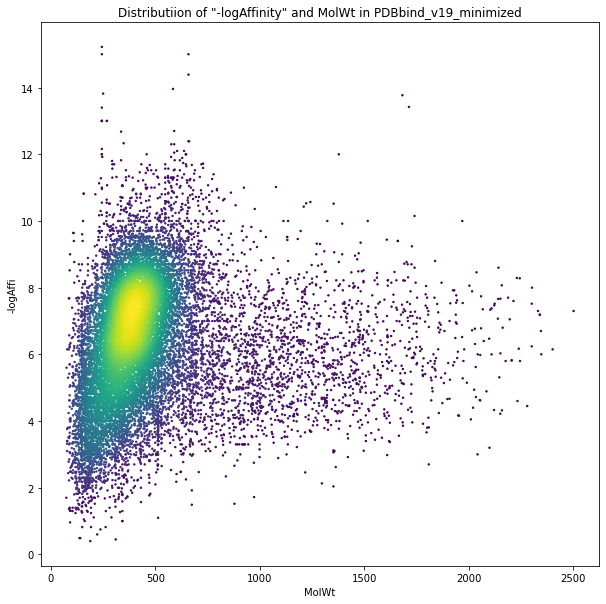

In [48]:
xy = np.vstack([PDBbind_minimized_Mw_from_smi_notna_df['Mw_from_smi'], PDBbind_minimized_Mw_from_smi_notna_df['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = PDBbind_minimized_Mw_from_smi_notna_df['Mw_from_smi'][idx], PDBbind_minimized_Mw_from_smi_notna_df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('MolWt')
ax.set_ylabel('-logAffi')
plt.title('Distribution of "-logAffinity" and MolWt in PDBbind_v19_minimized')
# plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/PDBbind_v19_general_Affi_Mw_from_smi.png', dpi=300, bbox_inches='tight')

In [54]:
PDBbind_minimized_Mw_df.to_csv('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/minimized/PDBbind_minimized_RMSD_Mw.csv', sep='\t', index=False)

In [55]:
PDBbind_minimized_Mw_from_smi_notna_df.to_csv('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/minimized/PDBbind_minimized_RMSD_Mw_from_smi_notna_for_plot.csv', sep='\t', index=False)

# PDBBind_minimized_union_Uw

In [49]:
Uw_dealt_median_df_simple = Uw_dealt_median_df[['unique_identify', '-logAffi', 'MolWt']]
Uw_dealt_median_df_simple.head()

,unique_identify,-logAffi,MolWt
0,CHEMBL1075026_1swr_CHEMBL857,14.000000,244.088163
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970,219.056529
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000,219.056529
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970,233.072179
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781,204.111007


In [50]:
len(Uw_dealt_median_df_simple)

69826

In [52]:
PDBbind_minimized_Mw_from_smi_notna_df.head()

,pdb_id,-logAffi,RMSD,Mw_from_smi,Mw_from_sdf_txt
0,3zzf,0.40,0.312,189.063722,187.1
1,3gww,0.45,0.418,310.141325,310.2
2,1w8l,0.49,0.517,141.115364,141.1
3,3fqa,0.49,0.894,137.047678,136.1
4,1zsb,0.60,0.395,221.988132,222.2


In [53]:
len(PDBbind_minimized_Mw_from_smi_notna_df)

17011

In [56]:
PDBbind_minimized_Mw_from_smi_notna_df.drop(columns=['RMSD', 'Mw_from_sdf_txt'], inplace=True)
PDBbind_minimized_Mw_from_smi_notna_df.rename(columns={"pdb_id": "unique_identify", "Mw_from_smi": "MolWt"}, inplace=True)
PDBbind_minimized_Mw_from_smi_notna_df.head()

,unique_identify,-logAffi,MolWt
0,3zzf,0.40,189.063722
1,3gww,0.45,310.141325
2,1w8l,0.49,141.115364
3,3fqa,0.49,137.047678
4,1zsb,0.60,221.988132


In [58]:
PDBbind_minimized_union_Uw = pd.concat([Uw_dealt_median_df_simple, PDBbind_minimized_Mw_from_smi_notna_df], ignore_index=True)
len(PDBbind_minimized_union_Uw)

86837

In [59]:
PDBbind_minimized_union_Uw

,unique_identify,-logAffi,MolWt
0,CHEMBL1075026_1swr_CHEMBL857,14.000000,244.088163
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970,219.056529
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000,219.056529
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970,233.072179
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781,204.111007
...,...,...,...
86832,7cpa,13.960000,584.228753
86833,2xuf,14.390000,658.353243
86834,1avd,15.000000,244.088163
86835,2xui,15.000000,658.353243


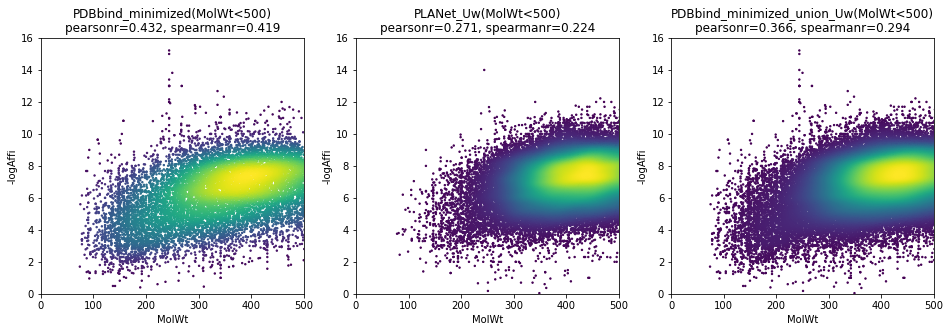

In [83]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized', 'PLANet_Uw', 'PDBbind_minimized_union_Uw']
for i, df in enumerate([PDBbind_minimized_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_union_Uw]):
    df_truncated = df[df['MolWt']<500].copy()
    pearsonr = stats.pearsonr(df_truncated['MolWt'], df_truncated['-logAffi'])
    spearmanr = stats.spearmanr(df_truncated['MolWt'], df_truncated['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}(MolWt<500)\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    ax.set_xlim((0,500))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_VS_Uw_Affi_Mw_500.png', dpi=300, bbox_inches='tight')

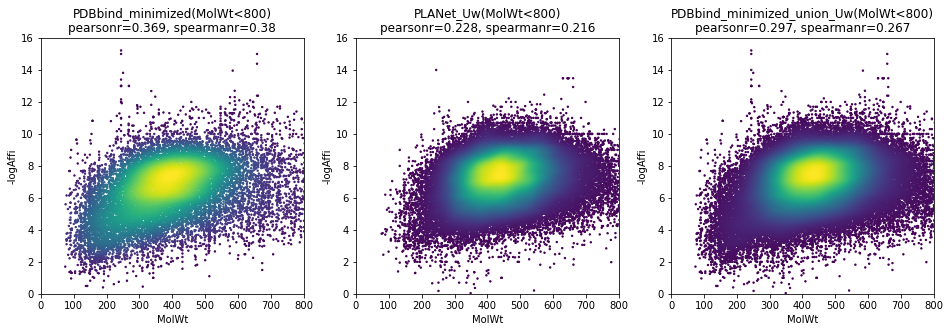

In [90]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized', 'PLANet_Uw', 'PDBbind_minimized_union_Uw']
for i, df in enumerate([PDBbind_minimized_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_union_Uw]):
    df_truncated = df[df['MolWt']<800].copy()
    pearsonr = stats.pearsonr(df_truncated['MolWt'], df_truncated['-logAffi'])
    spearmanr = stats.spearmanr(df_truncated['MolWt'], df_truncated['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}(MolWt<800)\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    ax.set_xlim((0,800))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_VS_Uw_Affi_Mw_800.png', dpi=300, bbox_inches='tight')

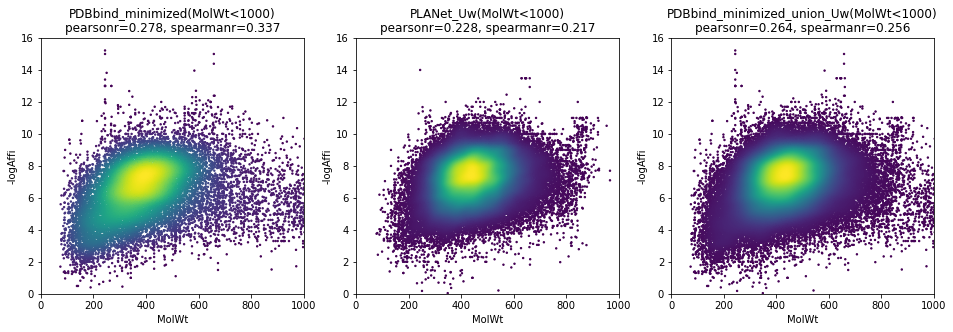

In [84]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized', 'PLANet_Uw', 'PDBbind_minimized_union_Uw']
for i, df in enumerate([PDBbind_minimized_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_union_Uw]):
    df_truncated = df[df['MolWt']<1000].copy()
    pearsonr = stats.pearsonr(df_truncated['MolWt'], df_truncated['-logAffi'])
    spearmanr = stats.spearmanr(df_truncated['MolWt'], df_truncated['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}(MolWt<1000)\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    ax.set_xlim((0,1000))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_VS_Uw_Affi_Mw_1000.png', dpi=300, bbox_inches='tight')

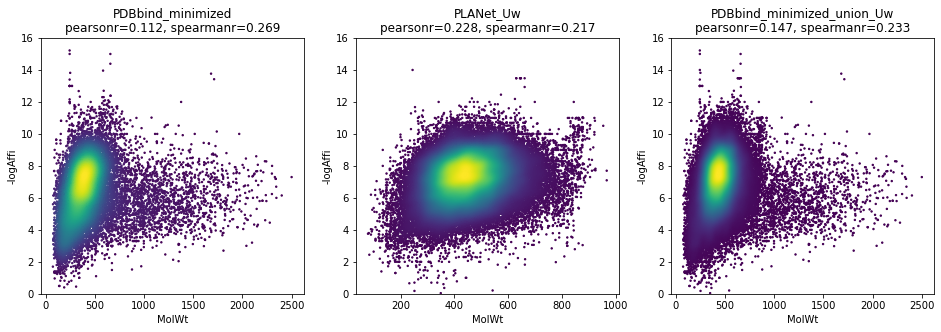

In [85]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized', 'PLANet_Uw', 'PDBbind_minimized_union_Uw']
for i, df in enumerate([PDBbind_minimized_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_union_Uw]):
    # df_truncated = df[df['MolWt']<500].copy()
    pearsonr = stats.pearsonr(df['MolWt'], df['-logAffi'])
    spearmanr = stats.spearmanr(df['MolWt'], df['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    # ax.set_xlim((0,1000))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_VS_Uw_Affi_Mw.png', dpi=300, bbox_inches='tight')

# PDBbind_minimized_intersected_Uw

In [60]:
PDBbind_minimized_intersected_Uw_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/PDBbind_v2019/index/PDBbind_minimized_intersected_Uw/PDBbind_minimized_final_intersected_PLANet_Uw.csv', sep='\t')
PDBbind_minimized_intersected_Uw_df

,pdb_id,-logAffi
0,3fl9,1.11
1,2hdq,1.40
2,1utp,1.44
3,1tnk,1.49
4,1a7t,1.64
...,...,...
5903,4n70,12.00
5904,3o9h,12.10
5905,3o9g,12.30
5906,1q83,12.39


In [61]:
PDBbind_minimized_intersected_Uw_Mw_df = pd.merge(PDBbind_minimized_intersected_Uw_df, PDBbind_v19_general_df, on=['pdb_id','-logAffi'], how='left')
PDBbind_minimized_intersected_Uw_Mw_df

,pdb_id,-logAffi,Mw_from_smi,Mw_from_sdf_txt
0,3fl9,1.11,290.137890,290.2
1,2hdq,1.40,127.993200,127.1
2,1utp,1.44,150.127726,150.1
3,1tnk,1.49,136.112076,136.1
4,1a7t,1.64,196.063805,196.1
...,...,...,...,...
5903,4n70,12.00,458.179836,458.3
5904,3o9h,12.10,604.245452,604.4
5905,3o9g,12.30,590.266187,590.4
5906,1q83,12.39,661.376170,661.5


In [62]:
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df = PDBbind_minimized_intersected_Uw_Mw_df[~PDBbind_minimized_intersected_Uw_Mw_df['Mw_from_smi'].isna()].copy()
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df.reset_index(drop=True, inplace=True)

In [63]:
len(PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df)

5883

In [69]:
PDBbind_minimized_intersected_Uw_Mw_df.to_csv('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/minimized/PDBbind_minimized_intersected_Uw_Mw.csv', sep='\t', index=False)

In [70]:
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df.to_csv('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/minimized/PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_for_plot.csv', sep='\t', index=False)

Text(0.5, 1.0, 'Distributiion of "-logAffinity" and MolWt in PDBbind_v19_minimized_intersected_Uw(N=5883)')

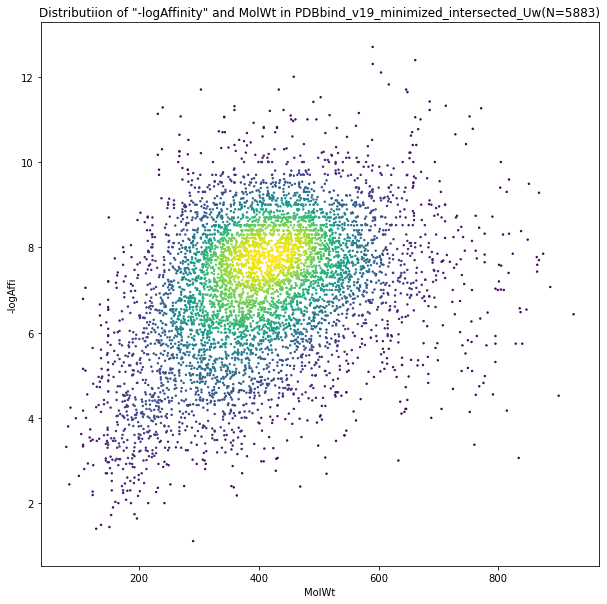

In [66]:
xy = np.vstack([PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df['Mw_from_smi'], PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df['Mw_from_smi'][idx], PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y, y_, s=2, c=z, zorder=2)
ax.set_xlabel('MolWt')
ax.set_ylabel('-logAffi')
plt.title(f'Distribution of "-logAffinity" and MolWt in PDBbind_v19_minimized_intersected_Uw(N={len(PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df)})')
# plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind/PDBbind_v19_general_Affi_Mw_from_smi.png', dpi=300, bbox_inches='tight')

# PDBbind_minimized_intersected_Uw_union_Uw

In [67]:
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df

,pdb_id,-logAffi,Mw_from_smi,Mw_from_sdf_txt
0,3fl9,1.11,290.137890,290.2
1,2hdq,1.40,127.993200,127.1
2,1utp,1.44,150.127726,150.1
3,1tnk,1.49,136.112076,136.1
4,1a7t,1.64,196.063805,196.1
...,...,...,...,...
5878,4n70,12.00,458.179836,458.3
5879,3o9h,12.10,604.245452,604.4
5880,3o9g,12.30,590.266187,590.4
5881,1q83,12.39,661.376170,661.5


In [71]:
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df.drop(columns=[ 'Mw_from_sdf_txt'], inplace=True)
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df.rename(columns={"pdb_id": "unique_identify", "Mw_from_smi": "MolWt"}, inplace=True)
PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df.head()

,unique_identify,-logAffi,MolWt
0,3fl9,1.11,290.137890
1,2hdq,1.40,127.993200
2,1utp,1.44,150.127726
3,1tnk,1.49,136.112076
4,1a7t,1.64,196.063805


In [73]:
PDBbind_minimized_intersected_Uw_union_Uw = pd.concat([Uw_dealt_median_df_simple, PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df], ignore_index=True)
len(PDBbind_minimized_intersected_Uw_union_Uw)

75709

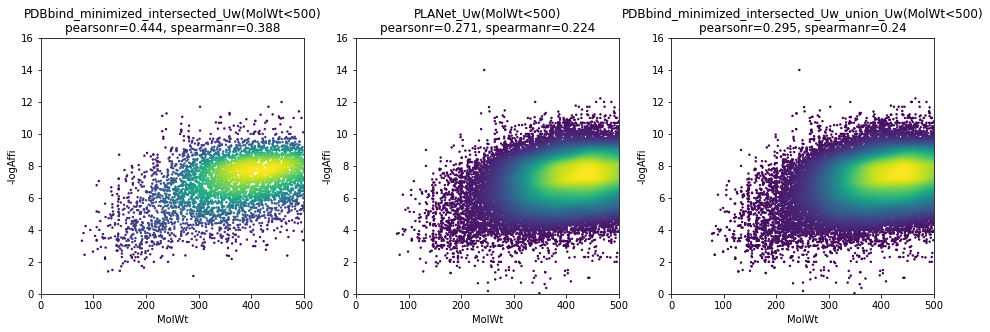

In [86]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized_intersected_Uw', 'PLANet_Uw', 'PDBbind_minimized_intersected_Uw_union_Uw']
for i, df in enumerate([PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_intersected_Uw_union_Uw]):
    df_truncated = df[df['MolWt']<500].copy()
    pearsonr = stats.pearsonr(df_truncated['MolWt'], df_truncated['-logAffi'])
    spearmanr = stats.spearmanr(df_truncated['MolWt'], df_truncated['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}(MolWt<500)\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    ax.set_xlim((0,500))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_intersected_Uw_VS_Uw_Affi_Mw_500.png', dpi=300, bbox_inches='tight')

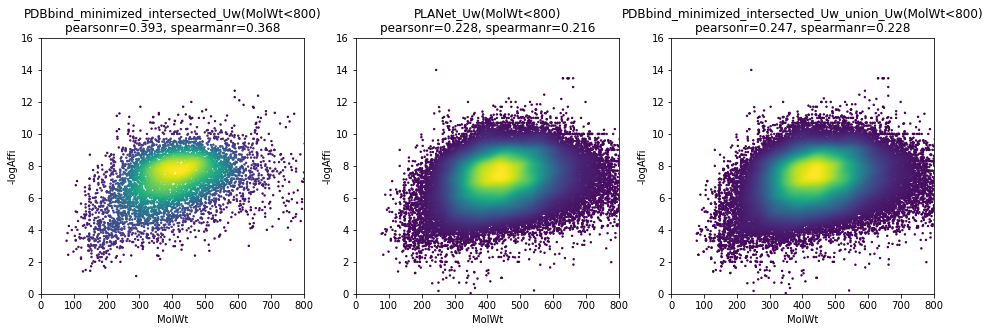

In [89]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized_intersected_Uw', 'PLANet_Uw', 'PDBbind_minimized_intersected_Uw_union_Uw']
for i, df in enumerate([PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_intersected_Uw_union_Uw]):
    df_truncated = df[df['MolWt']<800].copy()
    pearsonr = stats.pearsonr(df_truncated['MolWt'], df_truncated['-logAffi'])
    spearmanr = stats.spearmanr(df_truncated['MolWt'], df_truncated['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}(MolWt<800)\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    ax.set_xlim((0,800))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_intersected_Uw_VS_Uw_Affi_Mw_800.png', dpi=300, bbox_inches='tight')

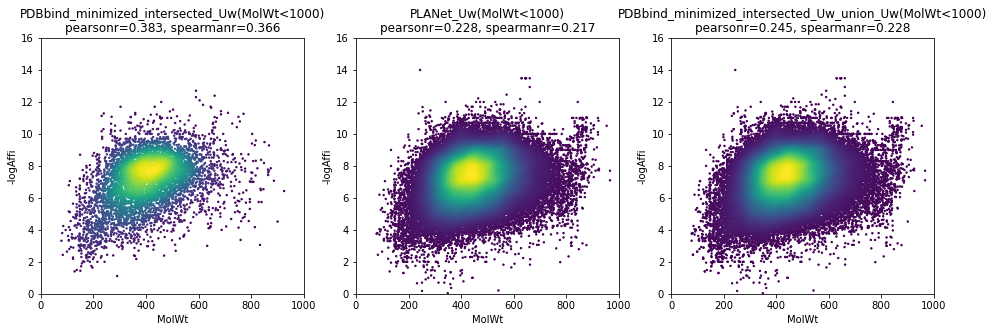

In [87]:
# fig = plt.figure(figsize=(16,16))
# names = ['PDBbind_minimized_intersected_Uw', 'PLANet_Uw', 'PDBbind_minimized_intersected_Uw_union_Uw']
# for i, df in enumerate([PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_intersected_Uw_union_Uw]):
#     df_truncated = df[df['MolWt']<1000].copy()
#     pearsonr = stats.pearsonr(df_truncated['MolWt'], df_truncated['-logAffi'])
#     spearmanr = stats.spearmanr(df_truncated['MolWt'], df_truncated['-logAffi'])
    
#     ax = fig.add_subplot(3, 3, i+1)
#     xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
#     g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
#     z = g(xy)  #计算每个xy样本点的概率密度

#     # Sort the points by density, so that the densest points are plotted last
#     idx = z.argsort()  #对z值排序并返回索引
#     y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

#     ax.scatter(y, y_, s=2, c=z, zorder=2)
#     ax.set_xlabel('MolWt')
#     ax.set_ylabel('-logAffi')
#     ax.set_title(f'{names[i]}(MolWt<1000)\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
#     ax.set_xlim((0,1000))
#     ax.set_ylim((0,16))
# plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_intersected_Uw_VS_Uw_Affi_Mw_1000.png', dpi=300, bbox_inches='tight')

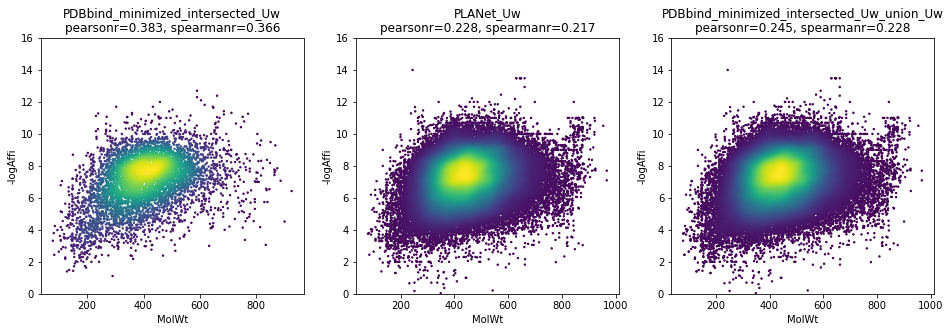

In [88]:
fig = plt.figure(figsize=(16,16))
names = ['PDBbind_minimized_intersected_Uw', 'PLANet_Uw', 'PDBbind_minimized_intersected_Uw_union_Uw']
for i, df in enumerate([PDBbind_minimized_intersected_Uw_Mw_from_smi_notna_df, Uw_dealt_median_df_simple, PDBbind_minimized_intersected_Uw_union_Uw]):
    # df_truncated = df[df['MolWt']<1000].copy()
    pearsonr = stats.pearsonr(df['MolWt'], df['-logAffi'])
    spearmanr = stats.spearmanr(df['MolWt'], df['-logAffi'])
    
    ax = fig.add_subplot(3, 3, i+1)
    xy = np.vstack([df['MolWt'], df['-logAffi']])  #按行叠加
    g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
    z = g(xy)  #计算每个xy样本点的概率密度

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()  #对z值排序并返回索引
    y, y_, z = df['MolWt'][idx], df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

    ax.scatter(y, y_, s=2, c=z, zorder=2)
    ax.set_xlabel('MolWt')
    ax.set_ylabel('-logAffi')
    ax.set_title(f'{names[i]}\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
    # ax.set_xlim((0,1000))
    ax.set_ylim((0,16))
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/PDBbind_minimized_intersected_Uw_VS_Uw_Affi_Mw.png', dpi=300, bbox_inches='tight')

# 2. Compound numbers for each target

In [3]:
Uw_dealt_median = f'/pubhome/xli02/project/PLIM/v2019_dataset/index/PLANet_Uw_dealt_median.csv'
Uw_dealt_median_df = pd.read_csv(Uw_dealt_median, sep='\t')
len(Uw_dealt_median_df)

69826

In [4]:
Uw_dealt_median_df.head()

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,Diff_an,Part_fix,Total_sampled_num,Similar_compnd_conform,Total_delta,Lig_delta,Core_RMSD,MolWt,MCS_smarts,target_compnd
0,CHEMBL1075026_1swr_CHEMBL857,14.000000,CHEMBL1075026,1swr,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,CHEMBL857,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,1.00000,...,0,No,6,CHEMBL857-0-0,-51.95,-3.19,0.283368,244.088163,[#6](-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]1...,CHEMBL1075026_CHEMBL857
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL257158,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,1.00000,...,0,No,6,CHEMBL257158-1-0,22.72,-9.82,0.259684,219.056529,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL257158
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL403756,CC1=N[C@H]2[C@H](O[C@H](CO)[C@H](O)[C@@H]2O)S1,14,1.00000,...,0,No,6,CHEMBL403756-0-0,11.87,-3.73,0.667258,219.056529,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL403756
3,CHEMBL1075027_1hp5_CHEMBL404356,3.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL404356,CC1=N[C@@H]2[C@@H](O)[C@H](O)[C@@H](CO)O[C@]2(...,15,0.82487,...,1,No,6,CHEMBL404356-3-0,26.98,-11.12,0.352828,233.072179,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL404356
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781,CHEMBL1075027,1jak,CC(=O)N[C@H]1[NH2+]C[C@H](CO)[C@H](O)[C@@H]1O,14,CHEMBL253537,CC(=O)N[C@@H]1NC[C@H](CO)[C@H](O)[C@@H]1O,14,1.00000,...,0,No,6,CHEMBL253537-0-0,-117.77,-16.52,0.342688,204.111007,[#6]1(-&@[#7]-&@[#6]-&@[#6](-&@[#6](-&@[#6]-&@...,CHEMBL1075027_CHEMBL253537


In [6]:
target_count_df = pd.DataFrame({'count':Uw_dealt_median_df.groupby('Target_chembl_id').size()}).reset_index()
target_count_df

,Target_chembl_id,count
0,CHEMBL1075026,1
1,CHEMBL1075027,4
2,CHEMBL1075040,4
3,CHEMBL1075041,1
4,CHEMBL1075045,6
...,...,...
798,CHEMBL6145,27
799,CHEMBL6154,128
800,CHEMBL6164,210
801,CHEMBL6166,53


In [7]:
max(target_count_df['count'])

3707

In [8]:
bins=[0, 1, 10, 50, 100, 1000, 3730]
labels=['1', '2-10', '11-50', '51-100', '101-1000', '>1000']
target_count_df['count_group'] = pd.cut(target_count_df['count'], bins=bins, labels=labels)
target_count_df

,Target_chembl_id,count,count_group
0,CHEMBL1075026,1,1
1,CHEMBL1075027,4,2-10
2,CHEMBL1075040,4,2-10
3,CHEMBL1075041,1,1
4,CHEMBL1075045,6,2-10
...,...,...,...
798,CHEMBL6145,27,11-50
799,CHEMBL6154,128,101-1000
800,CHEMBL6164,210,101-1000
801,CHEMBL6166,53,51-100


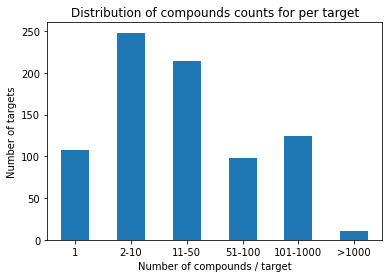

In [9]:
target_count_df['count_group'].value_counts(sort=False).plot.bar(rot=0)
plt.title('Distribution of compounds counts for per target')
plt.xlabel('Number of compounds / target')
plt.ylabel('Number of targets')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/Uw/compounds_count_for_each_target.png', dpi=300, bbox_inches='tight')

# 3. -logAffi Distribution

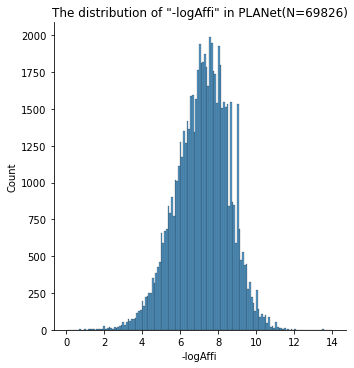

In [15]:
sns.displot(Uw_dealt_median_df, x="-logAffi")
plt.title(f'The distribution of "-logAffi" in PLANet(N={len(Uw_dealt_median_df)})')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_affinity/Binding_affinity_distribution_Uw.png', dpi=300, bbox_inches='tight')

In [11]:
PDBbind_dir = '/pubhome/xli02/Downloads/dataset/PDBbind/PDBbind_v2019'

In [12]:
PDBbind_v19_general = f'{PDBbind_dir}/INDEX_general_PL_data_grepped.2019'
PDBbind_v19_general_df = pd.read_csv(PDBbind_v19_general, sep='\t')
PDBbind_v19_general_df.head()

,pdb_id,-logAffi
0,3zzf,0.40
1,3gww,0.45
2,1w8l,0.49
3,3fqa,0.49
4,1zsb,0.60


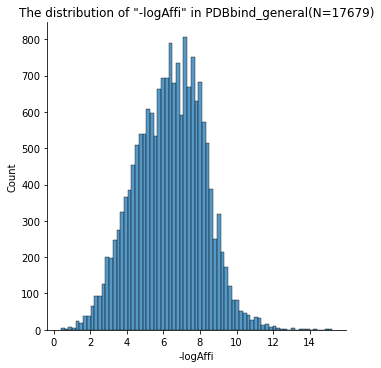

In [16]:
# sns.displot(PDBbind_v19_general_df, x="-logAffi")
# plt.title(f'The distribution of "-logAffi" in PDBbind_general(N={len(PDBbind_v19_general_df)})')
# plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_affinity/Binding_affinity_distribution_PDBbind_general.png', dpi=300, bbox_inches='tight')

In [13]:
PDBbind_minimized_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/PDBbind_v2019/index/PDBbind_v19_minimized_succeed_RMSD_manually_modified.csv', sep='\t')
PDBbind_minimized_df.head()

,pdb_id,-logAffi,RMSD
0,3zzf,0.40,0.312
1,3gww,0.45,0.418
2,1w8l,0.49,0.517
3,3fqa,0.49,0.894
4,1zsb,0.60,0.395


In [14]:
PDBbind_minimized_intersected_Uw_df = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/PDBbind_v2019/index/PDBbind_minimized_intersected_Uw/PDBbind_minimized_final_intersected_PLANet_Uw.csv', sep='\t')
PDBbind_minimized_intersected_Uw_df

,pdb_id,-logAffi
0,3fl9,1.11
1,2hdq,1.40
2,1utp,1.44
3,1tnk,1.49
4,1a7t,1.64
...,...,...
5903,4n70,12.00
5904,3o9h,12.10
5905,3o9g,12.30
5906,1q83,12.39


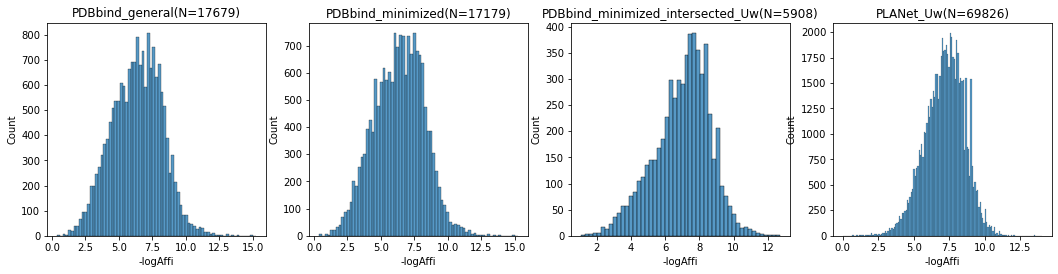

In [26]:
fig = plt.figure(figsize=(18,18))
names = ['PDBbind_general', 'PDBbind_minimized', 'PDBbind_minimized_intersected_Uw', 'PLANet_Uw']
for i, df in enumerate([PDBbind_v19_general_df, PDBbind_minimized_df, PDBbind_minimized_intersected_Uw_df, Uw_dealt_median_df]):
    ax = fig.add_subplot(4, 4, i+1)
    sns.histplot(df, x="-logAffi", ax=ax)
    ax.set_title(f'{names[i]}(N={len(df)})')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_affinity/Binding_affinity_distribution_compare_with_PDBbind.png', dpi=300, bbox_inches='tight')

# 4. Mw distribution

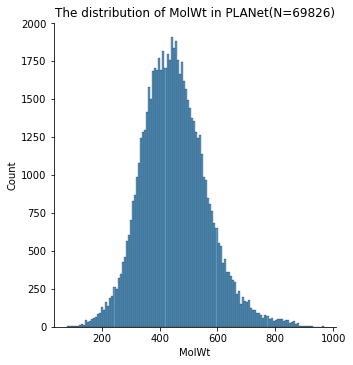

In [27]:
sns.displot(Uw_dealt_median_df, x="MolWt")
plt.title(f'The distribution of MolWt in PLANet(N={len(Uw_dealt_median_df)})')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_Mw/Mw_distribution_Uw.png', dpi=300, bbox_inches='tight')

# 5. core_RMSD distribution

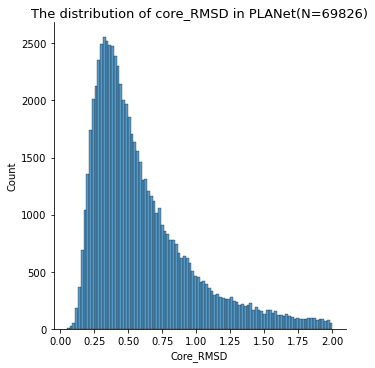

In [28]:
sns.displot(Uw_dealt_median_df, x="Core_RMSD")
plt.title(f'The distribution of core_RMSD in PLANet(N={len(Uw_dealt_median_df)})', fontsize = 13)
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_coreRMSD/core_RMSD_distribution_Uw.png', dpi=300, bbox_inches='tight')

# 6. Total_delta

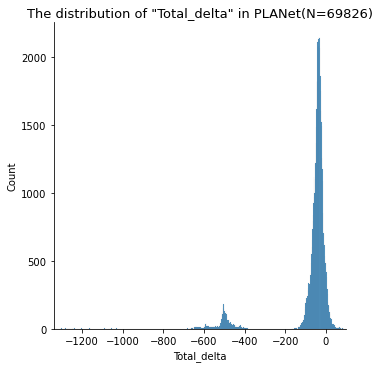

In [29]:
sns.displot(Uw_dealt_median_df, x="Total_delta")
plt.xlim(min(Uw_dealt_median_df['Total_delta']),max(Uw_dealt_median_df['Total_delta']))
plt.title(f'The distribution of "Total_delta" in PLANet(N={len(Uw_dealt_median_df)})', fontsize = 13)
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_total_delta/Total_delta_distribution_Uw.png', dpi=300, bbox_inches='tight')

In [31]:
Uw_dealt_median_df[Uw_dealt_median_df['Total_delta'] < -800]

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,Diff_an,Part_fix,Total_sampled_num,Similar_compnd_conform,Total_delta,Lig_delta,Core_RMSD,MolWt,MCS_smarts,target_compnd
30,CHEMBL1075097_3kv2_CHEMBL1234777,7.327902,CHEMBL1075097,3kv2,N/C(=N\O)NCC[C@H]([NH3+])C(=O)O,12,CHEMBL1234777,N=C(NO)NCC[C@H](N)C(=O)O,12,0.845588,...,0,No,6,CHEMBL1234777-0-0,-1312.78,-19.77,0.536524,176.090940,[#7]-&!@[#6](-&!@[#6](-&!@[#8])=&!@[#8])-&!@[#...,CHEMBL1075097_CHEMBL1234777
32,CHEMBL1075097_3mfv_CHEMBL1099168,2.522879,CHEMBL1075097,3mfv,Nc1ncc(CC[C@H]([NH3+])C(=O)O)[nH]1,13,CHEMBL1099168,Nc1ncc(CC[C@H](N)C(=O)O)[nH]1,13,1.000000,...,0,No,6,CHEMBL1099168-1-0,-1326.80,-12.32,0.823249,184.096026,[#6](-&!@[#6](-&!@[#8])=&!@[#8])(-&!@[#6]-&!@[...,CHEMBL1075097_CHEMBL1099168
1420,CHEMBL1169598_4yyl_CHEMBL3600947,5.013228,CHEMBL1169598,4yyl,O=C(COc1ccc(F)cc1)c1ccc(O)c(O)c1O,20,CHEMBL3600947,O=C(COc1ccc(F)cc1)c1ccc(O)c(O)c1O,20,1.000000,...,0,No,6,CHEMBL3600947-0-0,-938.78,-16.04,0.501342,278.059052,[#6]1:&@[#6]:&@[#6](-&!@[#9]):&@[#6]:&@[#6]:&@...,CHEMBL1169598_CHEMBL3600947
1660,CHEMBL1293244_1jje_CHEMBL1231277,8.045999,CHEMBL1293244,1jje,O=C(O)[C@@H](Cc1ccccc1)[C@H](Cc1ccc2c(c1)OCO2)...,25,CHEMBL1231277,O=C(O)[C@@H](Cc1ccc2c(c1)OCO2)[C@H](Cc1ccc2c(c...,28,1.000000,...,3,No,12,CHEMBL1231277-2-0,-1139.35,-19.38,0.452814,386.100168,[#6](-&!@[#6](-&!@[#6]-&!@[#6]1:&@[#6]:&@[#6]:...,CHEMBL1293244_CHEMBL1231277
1661,CHEMBL1293244_1jje_CHEMBL1231535,8.432033,CHEMBL1293244,1jje,O=C(O)[C@@H](Cc1ccccc1)[C@H](Cc1ccc2c(c1)OCO2)...,25,CHEMBL1231535,O=C(O)[C@@H](Cc1ccccc1)[C@H](Cc1ccc2c(c1)OCO2)...,25,1.000000,...,0,No,6,CHEMBL1231535-4-0,-1142.58,-17.03,0.355232,342.110338,[#6](-&!@[#6](-&!@[#6]-&!@[#6]1:&@[#6]:&@[#6]:...,CHEMBL1293244_CHEMBL1231535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51986,CHEMBL4295695_6ewe_CHEMBL4126927,5.508638,CHEMBL4295695,6ewe,O=C(O)/C(S)=C/c1csc2ccccc12,15,CHEMBL4126927,O=C(O)/C(S)=C/c1csc2ccccc12,15,1.000000,...,0,No,6,CHEMBL4126927-0-0,-1025.35,-9.72,1.671443,235.996571,[#6]1(:&@[#6]:&@[#16]:&@[#6]2:&@[#6]:&@1:&@[#6...,CHEMBL4295695_CHEMBL4126927
64736,CHEMBL5027_5fv7_CHEMBL361546,10.958607,CHEMBL5027,5fv7,O=c1c2sccc2n(C[C@H]2COc3ccccc3O2)c(=O)n1O,23,CHEMBL361546,O=c1c2sccc2n(CC2COc3ccccc3O2)c(=O)n1O,23,1.000000,...,0,No,6,CHEMBL361546-0-0,-1054.65,-12.38,0.729847,332.046692,[#6]1:&@[#6]:&@[#6]:&@[#6]2:&@[#6](:&@[#6]:&@1...,CHEMBL5027_CHEMBL361546
67459,CHEMBL5440_4f6x_CHEMBL2063256,6.346787,CHEMBL5440,4f6x,CCCCCCOc1cccc(Cn2ccc(O)c(C(=O)O)c2=O)c1,25,CHEMBL2063256,CCCCCCOc1cccc(Cn2ccc(O)c(C(=O)O)c2=O)c1,25,1.000000,...,0,No,6,CHEMBL2063256-3-0,-910.65,-16.91,1.236008,345.157623,[#6](-&!@[#6])-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]...,CHEMBL5440_CHEMBL2063256
68509,CHEMBL5798_4c1d_CHEMBL1560,6.221849,CHEMBL5798,4c1d,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,14,CHEMBL1560,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,14,1.000000,...,0,No,6,CHEMBL1560-0-0,-900.20,-8.60,0.171020,217.077264,[#8]=&!@[#6](-&!@[#6](-&!@[#6]-&!@[#16])-&!@[#...,CHEMBL5798_CHEMBL1560


Text(0.5, 1.0, 'Relationship between "Total_delta" and Affinity of PLANet_Uw\npearsonr=-0.002, spearmanr=-0.106')

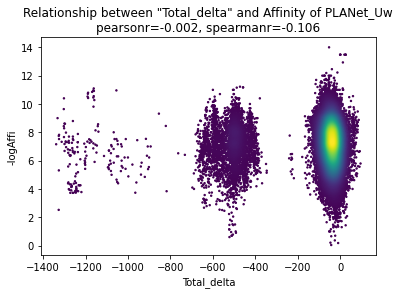

In [34]:
# pearsonr = stats.pearsonr(Uw_dealt_median_df['Total_delta'], Uw_dealt_median_df['-logAffi'])
# spearmanr = stats.spearmanr(Uw_dealt_median_df['Total_delta'], Uw_dealt_median_df['-logAffi'])

# xy = np.vstack([Uw_dealt_median_df['Total_delta'], Uw_dealt_median_df['-logAffi']])  #按行叠加
# g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
# z = g(xy)  #计算每个xy样本点的概率密度

# # Sort the points by density, so that the densest points are plotted last
# idx = z.argsort()  #对z值排序并返回索引
# y, y_, z = Uw_dealt_median_df['Total_delta'][idx], Uw_dealt_median_df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

# plt.scatter(y, y_, s=2, c=z, zorder=2)
# plt.xlabel('Total_delta')
# plt.ylabel('-logAffi')
# plt.title(f'Relationship between "Total_delta" and Affinity of PLANet_Uw\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')

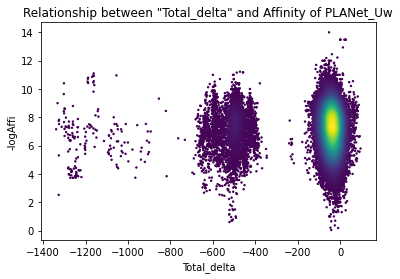

In [35]:
xy = np.vstack([Uw_dealt_median_df['Total_delta'], Uw_dealt_median_df['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = Uw_dealt_median_df['Total_delta'][idx], Uw_dealt_median_df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

plt.scatter(y, y_, s=2, c=z, zorder=2)
plt.xlabel('Total_delta')
plt.ylabel('-logAffi')
plt.title(f'Relationship between "Total_delta" and Affinity of PLANet_Uw')
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_total_delta/Total_delta-Affi.png', dpi=300, bbox_inches='tight')

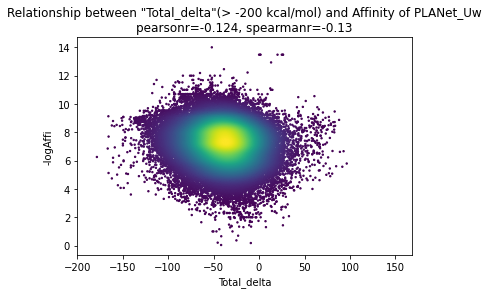

In [37]:
df_truncated = df[df['Total_delta'] > -200].copy()
pearsonr = stats.pearsonr(df_truncated['Total_delta'], df_truncated['-logAffi'])
spearmanr = stats.spearmanr(df_truncated['Total_delta'], df_truncated['-logAffi'])

xy = np.vstack([Uw_dealt_median_df['Total_delta'], Uw_dealt_median_df['-logAffi']])  #按行叠加
g = gaussian_kde(xy)  #根据xy进行核密度估计(kde) -> 关于xy的概率密度函数
z = g(xy)  #计算每个xy样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()  #对z值排序并返回索引
y, y_, z = Uw_dealt_median_df['Total_delta'][idx], Uw_dealt_median_df['-logAffi'][idx], z[idx]  #对y, y_根据z的大小进行排序

plt.scatter(y, y_, s=2, c=z, zorder=2)
plt.xlabel('Total_delta')
plt.ylabel('-logAffi')
plt.title(f'Relationship between "Total_delta"(> -200 kcal/mol) and Affinity of PLANet_Uw\npearsonr={round(pearsonr[0],3)}, spearmanr={round(spearmanr[0],3)}')
plt.xlim(-200,)
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_total_delta/Total_delta_-200-Affi.png', dpi=300, bbox_inches='tight')

# Lig_delta

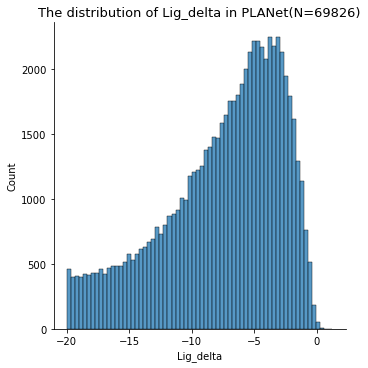

In [30]:
sns.displot(Uw_dealt_median_df, x="Lig_delta")
plt.title(f'The distribution of Lig_delta in PLANet(N={len(Uw_dealt_median_df)})', fontsize = 13)
plt.savefig('/pubhome/xli02/project/PLIM/analysis/distribution/distribution_of_lig_delta/Lig_delta_distribution_Uw.png', dpi=300, bbox_inches='tight')